In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:

social_N_data = pd.read_csv('Social_Network_Ads.csv')

In [4]:
social_N_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)
gender

,Male
0,True
1,True
2,False
3,False
4,True
...,...
395,False
396,True
397,False
398,True


In [6]:
social_N_data.drop('Gender',axis=1,inplace=True)

In [7]:
social_N_data = pd.concat([social_N_data,gender], axis=1)

In [8]:
social_N_data.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True


In [9]:
X = social_N_data.iloc[:,[1,2,4]] # Age, EstimatedSalary and Male
X.head()

,Age,EstimatedSalary,Male
0,19,19000,True
1,35,20000,True
2,26,43000,False
3,27,57000,False
4,19,76000,True


In [10]:
y = social_N_data.iloc[:, 3] # Purchased
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(360, 3)
(40, 3)
(360,)
(40,)


In [13]:
y_test

332    0
111    0
352    1
205    0
56     0
379    1
81     0
214    0
142    0
110    0
119    0
172    0
373    1
274    1
24     1
276    0
78     0
65     0
43     0
339    1
47     0
105    0
351    0
280    1
366    1
113    0
241    0
253    1
390    1
398    0
1      0
6      0
183    0
26     1
331    1
173    0
367    1
208    1
154    0
138    0
Name: Purchased, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression  
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
# flatten() đổi ra dạng số 


LogisticRegression()

In [15]:
classifier.coef_

array([[2.15200421, 1.08592164, 0.15798615]])

In [16]:
y_pred = classifier.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
332,0,0
111,0,0
352,1,1
205,0,1
56,0,0
379,1,1
81,0,0
214,0,1
142,0,0
110,0,0


In [17]:
classifier.coef_
# array([[2.36839196, 1.42929561, 0.20973787]])
# 3 đặc trưng của mảng

array([[2.15200421, 1.08592164, 0.15798615]])

In [18]:
# Câu 1: Hãy cho biết số góc của biến độc lập tương ứng với lương trong mông hình huấn luyện
classifier.coef_
#luong là 1.085921

array([[2.15200421, 1.08592164, 0.15798615]])

In [19]:
# Câu 2: hãy cho biết giá trị tuổi của dòng dữ liệu cuối cùng của tập dữu liệu đầu vào của tập dữu liệu train
# Lấy giá trị tuổi của dòng cuối cùng
X_train
last_row_age = X_train[:-1][0]

# In giá trị tuổi
print(f"Giá trị tuổi của dòng cuối cùng trong tập dữ liệu huấn luyện: {last_row_age}")


Giá trị tuổi của dòng cuối cùng trong tập dữ liệu huấn luyện: [ 0.31949142 -0.72655996  1.02020406]


In [20]:
# Câu 3: Hãy cho biết giá trị đầu ra của dòng cuối cùng trên tập dữ liệu train
y_train
y_train.iloc[-1]

1

In [21]:
# Câu 4: Giá trị chính xác với threshod=0.45 là bao nhiêu
df_test_new_threshold= (classifier.predict_proba(X_test)[:, 1] >= 0.45).astype(int)
df_test_new_threshold
from sklearn.metrics import accuracy_score
accuracy_score(y_test, df_test_new_threshold)

0.9

In [22]:
# 0 TN|FP       00||01
# 1 FN|TP       10||11

In [23]:
# Câu 5: StandardScaler trên tập dữu liệu input đầu vào
X_train

array([[ 0.31949142, -0.72655996,  1.02020406],
       [ 0.70154394, -0.72655996, -0.98019606],
       [-1.30423178, -1.49004624,  1.02020406],
       ...,
       [-0.82666613,  0.30121002,  1.02020406],
       [ 0.12846516, -0.25672226, -0.98019606],
       [ 0.41500455,  1.123426  , -0.98019606]])

Câu 6: Hãy cho biết với giới tính nữ , tuổi 46, lương 49000 thì người dùng này có mua hàng hay không với ngưỡng là 0.45


In [24]:
# câu 9
vT1 = 46
vT2 =  49000
vT3 = 0 
y_pred_tinh = classifier.predict([[vT1,vT2,vT3]])
prediction_label = (y_pred_tinh > 0.45).astype(int)
print('Dự báo định hướng :' +str(prediction_label[0]))

Dự báo định hướng :1


Câu 7: Hãy cho biết giá trị output sau khi đi qua hàm sigmod của dòng đầu tiên trên tập test

In [25]:
# Predict output on the test set
y_pred = classifier.predict(X_test)

# Extract predicted output for the first row
first_row_pred = y_pred[0]

print("Predicted output after sigmoid function for the first row:")
print(f"Predicted Output: {first_row_pred}")

Predicted output after sigmoid function for the first row:
Predicted Output: 0


Câu 8: Giá trị(TP , TN) với threshold mặc định là bao nhiêu

In [26]:
y_pred= classifier.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
from sklearn.metrics import confusion_matrix

cf_amtrix= confusion_matrix(y_test, y_pred)
cf_amtrix
# 0 TN|FP       00||01
# 1 FN|TP       10||11

array([[24,  2],
       [ 1, 13]], dtype=int64)

Câu 9: Viết thiết lập threshold trong mô hình phân lớp Logistic regression sẽ như thế nào nếu giá trị thresshold càng nhỏ khi so sánh với ngưỡng mặc định

In [27]:
y_pred_sosanh= classifier.predict(X_test)
# y_pred = (y_pred > 0.9).astype(int)
y_pred_sosanh
# from sklearn.metrics import confusion_matrix
# accuracy_score(y_test, y_pred)

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

Câu 11: Hãy cho biết giá trị đầu ra của dòng đầu tiên trước khi đi qua hàm sigmod trong mô hình trên tập test là bao nhiêu

In [28]:
# Dự đoán giá trị trước khi áp dụng hàm sigmoid
decision_function_output = classifier.decision_function(X_test)

print(f'Giá trị đầu ra trước khi đi qua hàm sigmoid: {decision_function_output}')

Giá trị đầu ra trước khi đi qua hàm sigmoid: [-0.13222544 -1.28465663  0.34893738  0.00547953 -4.89570429  1.50116035
 -1.48228187  0.19396331 -1.76236563 -0.87356732 -0.5290977  -2.04691499
  5.43474938  1.39127949 -0.64934001 -0.76307646 -2.62435161 -4.05524478
 -4.19315798  1.06875279 -3.88219806 -4.22544769 -0.84106939  3.77942067
  2.26647075 -1.47882805 -1.14573166  1.10693836  0.08062863 -2.38590724
 -3.00599503 -2.92556006 -2.68366188  0.12673362  2.50695538 -2.79415274
  1.42337565  1.5960206  -1.11729755 -3.51721374]


Câu 12: Hãy cho biết giá trị tương ứng của tuổi 46, lương 49000 và là nữ thì đi qua hàm chuẩn hóa dữ liệu sẽ trở thành giá trị là bao nhiêu

In [29]:
# câu 9
vT1 = 46
vT2 =  49000
vT3 = 0 
y_pred_12 = sc.transform([[vT1,vT2,vT3]])
y_pred_12

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.79705706, -0.60910054, -0.98019606]])

Câu 13: Nếu áp ngưỡng (theshold = 0.45) cho giá trị đầu sau khi đi qua hàm sigmod của dòng đầu tiên trong tập kiểm thử thì giá trị dự báo sẽ là bao nhiêu

In [30]:
# Dự đoán xác suất sử dụng mô hình cho dòng đầu tiên trong tập test
y_pred = classifier.predict(X_test[0:1])

# # Áp dụng hàm sigmoid cho kết quả dự đoán
y_pred_sigmoid = 1 / (1 + np.exp(-y_pred))

# So sánh với ngưỡng 0.45
if y_pred >= 0.45:
    prediction = 1  # Mua hàng
else:
    prediction = 0  # Không mua hàng

print("Giá trị dự báo với ngưỡng 0.45:", prediction)

Giá trị dự báo với ngưỡng 0.45: 0


Câu 15: Giá trị(TP, TN) với threshold = 0.45 là bao nhiêu

In [31]:
from sklearn.metrics import confusion_matrix

# Dự đoán các giá trị trên tập test với ngưỡng threshold = 0.45
y_pred = (classifier.predict_proba(X_test)[:, 1] >= 0.45).astype(int)

# Tính ma trận nhầm lẫn (confusion matrix)
confusion = confusion_matrix(y_test, y_pred)

# Trích xuất giá trị TP và TN từ ma trận nhầm lẫn
TP = confusion[1, 1]  # True Positives
TN = confusion[0, 0]  # True Negatives

print("True Positives (TP) với ngưỡng 0.45:", TP)
print("True Negatives (TN) với ngưỡng 0.45:", TN)

True Positives (TP) với ngưỡng 0.45: 13
True Negatives (TN) với ngưỡng 0.45: 23


In [32]:
# Câu 18: Hãy cho biết kích thước của tập dữ liệu kiểm thử
print(X_test.shape)


(40, 3)


liblinear

In [34]:
from sklearn.metrics import accuracy_score, roc_curve, auc
y_pred = classifier.predict(X_train)

# Tính Accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f'Accuracy: {accuracy}')

# Tính ROC Curve và AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

Accuracy: 0.8472222222222222
AUC: 0.8159166414980368


# ROC và AUE Plot

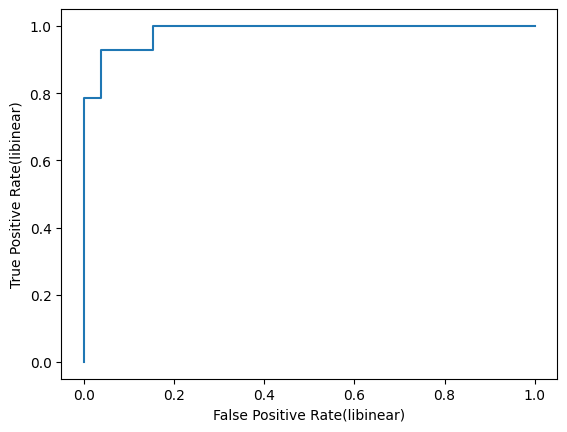

In [35]:
from sklearn import metrics
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate(libinear)')
plt.xlabel('False Positive Rate(libinear)')
plt.show() 

In [37]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.9835164835164836